In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
data = pd.read_csv('headbrain.csv')
data

,Gender,Age Range,Head Size,Brain Weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
x = data['Head Size'].values
y = data['Brain Weight'].values

In [8]:
mean_x = np.mean(x)
mean_y = np.mean(y)

n = len(x)

numer = 0
denom = 0

for i in range(n):
    numer += ((x[i] - mean_x)*(y[i] - mean_y))
    denom += (x[i] - mean_x) ** 2

b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

print(b1, b0)

[0.30537275] [156.90931668]


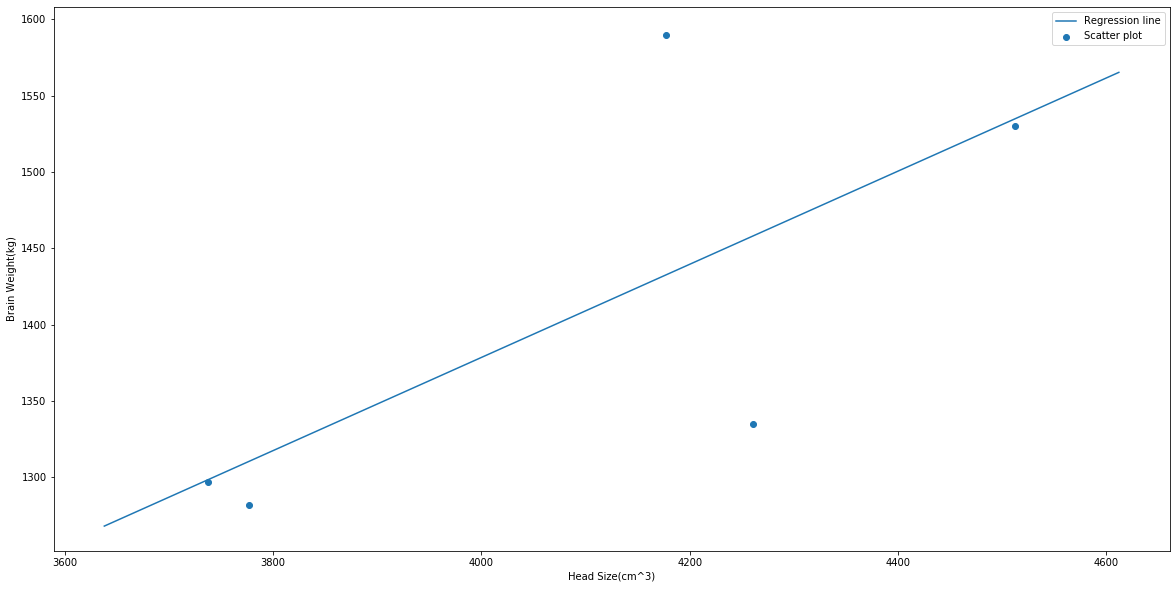

In [12]:
max_x = np.max(x) + 100
min_x = np.min(x) - 100

xp = np.linspace(min_x, max_x, 1000)
yp = b0 + b1 * xp

plt.plot(xp, yp, label='Regression line')
plt.scatter(x, y, label='Scatter plot')

plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(kg)')
plt.legend()
plt.show()

In [13]:
ss_t = 0
ss_r = 0

for i in range(n):
    y_pred = b0 + b1 * x[i]
    ss_t += (y[i] - mean_y) ** 2
    ss_r += (y[i] - y_pred) ** 2

r2 = 1 - (ss_r/ss_t)

print(r2)

[0.49953422]


In [7]:
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

x = x.reshape((n, 1))

reg = LinearRegression()

reg = reg.fit(x, y)

y_pred_1 = reg.predict(x)

r2_score = reg.score(x, y)
print(r2_score)

0.49953422225171634
